In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Question 1 data2**

In [11]:
import pandas as pd
data2=pd.read_csv(r"/content/drive/MyDrive/data2.txt", delim_whitespace = True, header = None)


In [12]:
def normalization(X):
    
    means = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
    
    
 
    stddevs = np.array([np.std(X[:,i]) for i in range(X.shape[1])])
        
    normal_=[]
    for i in range (X.shape[1]):
      mu=means[i]
      s=stddevs[i]
      normalized = (X[:,i]-mu)/s
      normal_.append(normalized)
    normal_=np.transpose(np.array(normal_))
    
    return normal_


In [13]:
def gradient_desc(W,X,Y):
  alpha=0.001
  grad_W=np.matmul(np.transpose(X),(np.matmul(X,W)-Y))
  W=W-alpha*grad_W/X.shape[0]
  
  return W

In [14]:
def mse(Y,Y_pred):
  a=Y_pred-Y
  x=np.matmul(np.transpose(a),a)
  return x[0][0]/Y.shape[0]

In [15]:
def r_value(Y,Y_pred):
  a=0
  b=0
  
  mu=np.mean(Y)
  for i in range (Y.shape[0]):
    a=a+(Y_pred[i][0]-Y[i][0])**2
    b=b+(Y[i][0]-mu)**2
  return (1-a/b)

In [16]:
def ridge_reg (W,X,Y,lambda_):
  alpha=0.001
  g=np.matmul(np.transpose(X),(np.matmul(X,W)-Y))

  grad_W=g/X.shape[0]+lambda_*W
  
  W=W-alpha*grad_W
  
  return W

Polynomial Order= 0
Validation error= 3.487783927075871
Validation r^2 value= -0.003293973215510171
Testing error= 4.349714585904244
Testing r^2 value= -0.07593800063458178


Polynomial Order= 1
Validation error= 3.503817964568586
Validation r^2 value= -0.007906315470392666
Testing error= 4.350092970782221
Testing r^2 value= -0.07603159727432462


Polynomial Order= 2
Validation error= 3.4786606422685407
Validation r^2 value= -0.0006695742118720815
Testing error= 4.2274732172452065
Testing r^2 value= -0.0457005836288642


Polynomial Order= 3
Validation error= 3.5162539113046587
Validation r^2 value= -0.011483632951178047
Testing error= 4.226296395370918
Testing r^2 value= -0.04540948697194125


Polynomial Order= 4
Validation error= 3.5464873699681543
Validation r^2 value= -0.020180572756154813
Testing error= 4.203588300200322
Testing r^2 value= -0.03979245117946717


Polynomial Order= 5
Validation error= 3.556452019626804
Validation r^2 value= -0.02304699830222101
Testing error= 4.20504

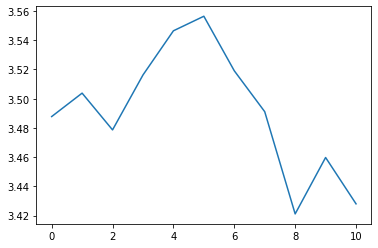

In [17]:
import numpy as np
import matplotlib.pyplot as plt
#Polynomial range
d=np.arange(0,11);
error=[]

data=data2
#Splitting of data
X=np.array([data[0:210][0],data[0:210][1]])
Y=data[0:210][2]
X_val=np.array([data[210:270][0],data[210:270][1]])
Y_val=data[210:270][2]
X_test=np.array([data[270:301][0],data[270:301][1]])
Y_test=data[270:301][2]
X=np.array(X).reshape(210,2)
Y=np.array(Y).reshape(210,1)
# Reshaping data
X_val=np.array(X_val).reshape(60,2)
Y_val=np.array(Y_val).reshape(60,1)
X_test=np.array(X_test).reshape(31,2)
Y_test=np.array(Y_test).reshape(31,1)
#Normalization of data
X_=normalization(X)
X_val_=normalization(X_val)
X_test_=normalization(X_test)



for pol in range (len(d)):
  index=int((d[pol]+1)*(2+d[pol])/2)
  W=np.zeros((index,1))
  print("Polynomial Order=",d[pol])
  #Calculating all polynomial terms of the equation for X
  X_new=np.ones((X_.shape[0],1))
  X_val_new=np.ones((X_val_.shape[0],1))
  X_test_new=np.ones((X_test_.shape[0],1))
  for i in range(1,d[pol]+1):
      for j in range(i+1):
        X_new=np.column_stack((X_new,np.power(X_[:,0],j)*np.power(X_[:,1],i-j)))
        X_val_new=np.column_stack((X_val_new,np.power(X_val_[:,0],j)*np.power(X_val_[:,1],i-j)))
        X_test_new=np.column_stack((X_test_new,np.power(X_test_[:,0],j)*np.power(X_test_[:,1],i-j)))
  #Gradient descent for multiple epochs for optimal W
  for epoch in range (100):
    W_new=gradient_desc(W,X_new,Y)
    
    
    #Training data
    Y_pred=np.matmul(X_new,W_new)
    
    W=W_new
   
    
    #Validation data
    Y_val_pred=np.matmul(X_val_new,W_new)
    
  print("Validation error=",mse(Y_val,Y_val_pred))
  print("Validation r^2 value=",r_value(Y_val,Y_val_pred))
  error.append(mse(Y_val,Y_val_pred))
 

  #Test data
  Y_test_pred=np.matmul(X_test_new,W)
 
  print("Testing error=",mse(Y_test,Y_test_pred))
  print("Testing r^2 value=",r_value(Y_test,Y_test_pred))
  print("\n")
#Error plot
plt.plot(d,error)
plt.show()

From the above plot we can verify 8th order gives the best results with the validation dataset. Hence 8th order is a good choice for the given dataset.

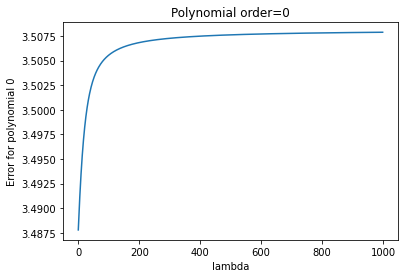

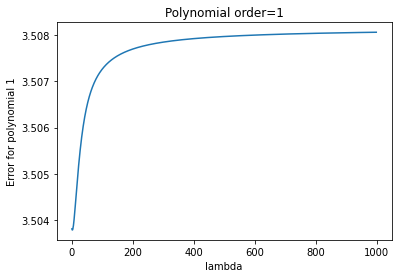

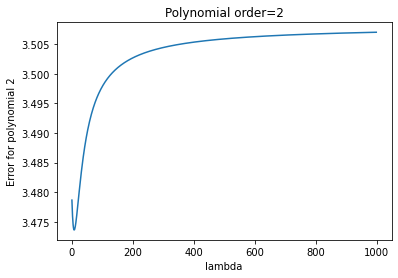

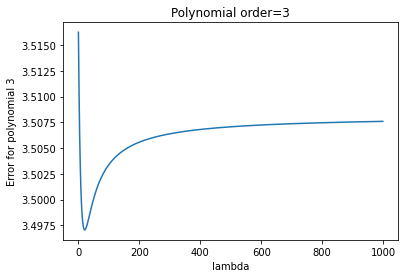

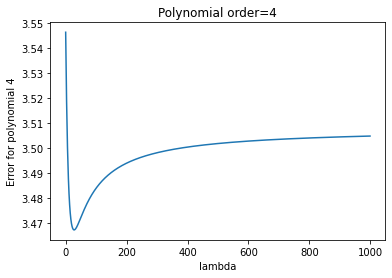

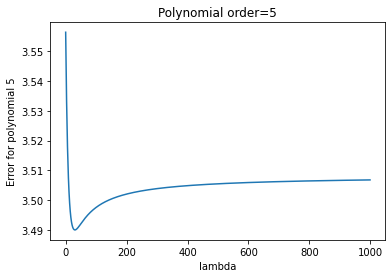

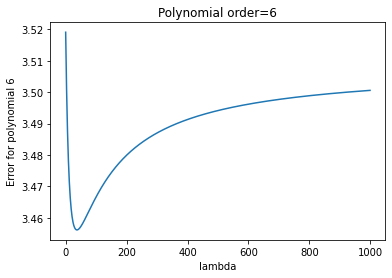

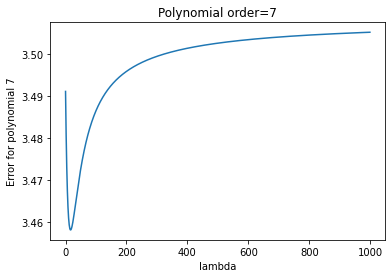

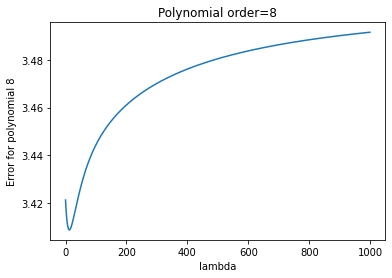

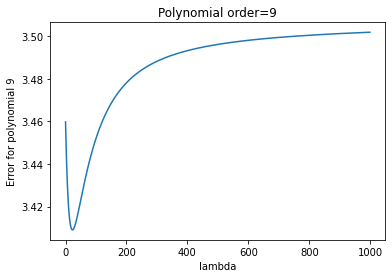

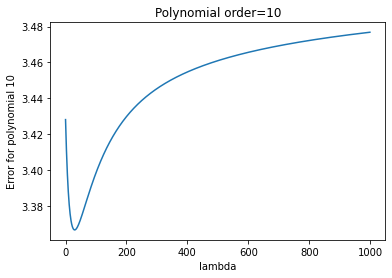

In [18]:
#A range of lambda values
lambda_=np.arange(0,1000)
error_pols=[]
for pol in range (len(d)):
  error=[]
  for l in range (len(lambda_)):
    index=int((d[pol]+1)*(2+d[pol])/2)
    
    W=np.zeros((index,1))
  #Calculating all polynomial terms for X
    X_new=np.ones((X_.shape[0],1))
    X_val_new=np.ones((X_val_.shape[0],1))
    X_test_new=np.ones((X_test_.shape[0],1))
    for i in range(1,d[pol]+1):
        for j in range(i+1):
          X_new=np.column_stack((X_new,np.power(X_[:,0],j)*np.power(X_[:,1],i-j)))
          X_val_new=np.column_stack((X_val_new,np.power(X_val_[:,0],j)*np.power(X_val_[:,1],i-j)))
          X_test_new=np.column_stack((X_test_new,np.power(X_test_[:,0],j)*np.power(X_test_[:,1],i-j)))
    #Ridge Regression 
    for epoch in range (100):
      W_new=ridge_reg(W,X_new,Y,lambda_[l])
      
      
    #Training dataset
      Y_pred=np.matmul(X_new,W_new)
      
      W=W_new
      #Validation dataset
      Y_val_pred=np.matmul(X_val_new,W_new)   
    error.append(mse(Y_val,Y_val_pred))
#Ridge Regression plot
  plt.plot(lambda_,error)
  plt.xlabel("lambda")
  plt.ylabel("Error for polynomial "+str(d[pol])) 
  plt.title("Polynomial order="+str(d[pol]))
  plt.show()
  
  
 
